# Exploring Why Civil Resistance Works - Question Solutions

Below are 7 asnwers for all the questions asked in wcrw.ipynb.
The code assumes that the file "WCRWreplication.dta" is located in the same folder as this notebook.

Consider questions 1-4, 5-6 and 7 as independent sets. Color hex numbers were found using snips of the helper plots with paint.net

> Dimitrios Stefanou
> A.M. 3160245

## Question 1

* Firstly, we read our dataset and format the time column
* Next, we create a new dataframe to store the needed sums for the next four questions
* The new dataframe will have 11 rows, one for each documented decade of events
* For each decade (meaning, for each i-row), we store the sum of the violent and nonviolent resistances, along with the sum of the successful ones
* Finally, we create our stackplot, which will represent the 'viol' and 'nonviol' columns over the 'decade's
* Towards the end of the millenium, nonviolent campaigns see a higher rise compared to violent ones

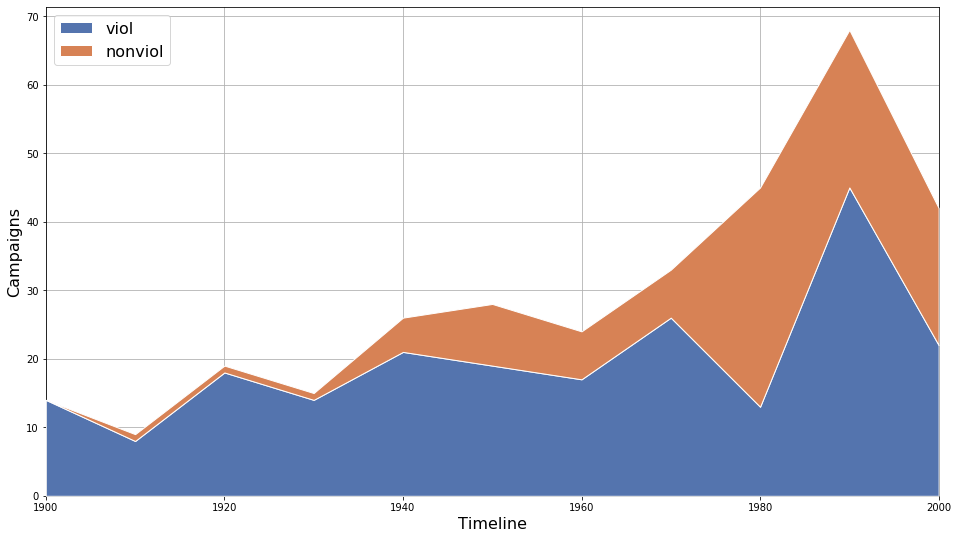

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# read dataset, format time
df = pd.read_stata("WCRWreplication.dta")
df['eyear'] = pd.to_datetime(df['eyear'], format='%Y')

# new dataframe with decades and sums of specifies events
freq = pd.DataFrame(columns = ['decade', 'viol', 'nonviol', 'viol_success', 'nonviol_success'])
decade = 1900
for i in range(11):
    freq.loc[i, 'decade'] = decade
    freq.loc[i, 'viol'] = df[(df['eyear'] >= pd.to_datetime(str(decade))) & (df['eyear'] <= pd.to_datetime(str(decade + 9)))].viol.sum()
    freq.loc[i, 'nonviol'] = df[(df['eyear'] >= pd.to_datetime(str(decade))) & (df['eyear'] <= pd.to_datetime(str(decade + 9)))].nonviol.sum()
    freq.loc[i, 'viol_success'] = df[(df['eyear'] >= pd.to_datetime(str(decade))) & (df['eyear'] <= pd.to_datetime(str(decade + 9))) & df['success'] == 1].viol.sum()
    freq.loc[i, 'nonviol_success'] = df[(df['eyear'] >= pd.to_datetime(str(decade))) & (df['eyear'] <= pd.to_datetime(str(decade + 9))) & df['success'] == 1].nonviol.sum()
    decade = decade + 10
    
# plot creation
plt.figure(figsize = (16,9))
plt.xlabel("Timeline", fontsize=16)
plt.ylabel("Campaigns", fontsize=16)
plt.grid(zorder = 0)
plt.stackplot(freq.decade, freq.viol, freq.nonviol, labels = ['viol', 'nonviol'], colors = ["#5474AE", "#D78255"], edgecolor = 'white', zorder = 3)
plt.margins(0, 0.05)
plt.legend(loc = 2, fontsize = 16)
plt.show()

## Question 2

* We calculate the percentage of nonviolent success by dividing the success by the total number of nonviolent resistances
* We create a new dataframe that holds the sum of nonviolent resistances and the percentages after 1940
* With the new dataframe, we create a barplot with two y-axes, one for each column
* Generally, nonviolent campaigns have a modest success rate after the 60's

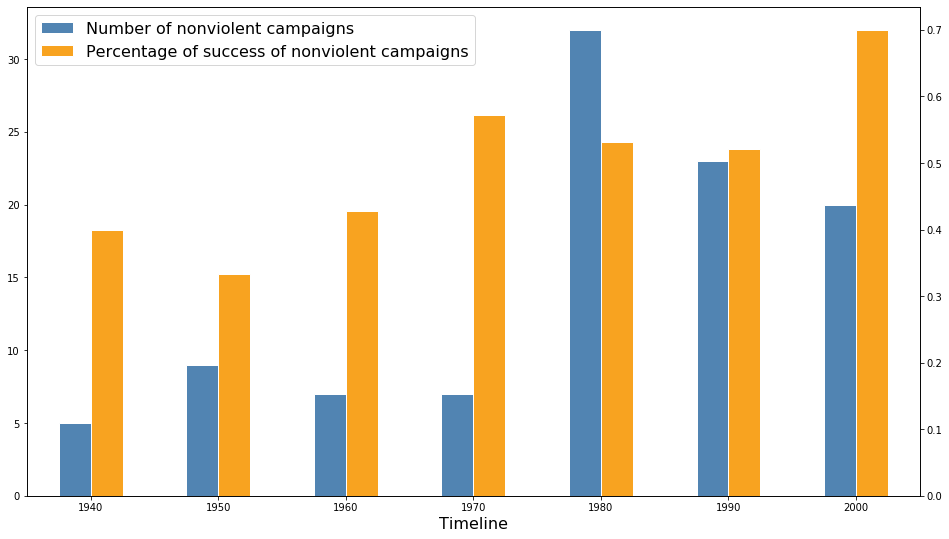

In [2]:
# calculate nonviolent success percentage
freq['nonviol_success_chance'] = (freq['nonviol_success']/freq['nonviol'])

# create new dataframe with specified decades for barplot 
nonviol_succ = pd.DataFrame()
nonviol_succ['Number of nonviolent campaigns'] = freq['nonviol'].loc[freq['decade'] >= 1940]
nonviol_succ['Percentage of success of nonviolent campaigns'] = freq['nonviol_success_chance'].loc[freq['decade'] >= 1940]

# create barplot. move legend and change its fontsize. cast 'decade' values to int (no floating point shown on x-axis). disable grid
ax = nonviol_succ.plot(kind = 'bar', secondary_y = 'Percentage of success of nonviolent campaigns', rot = 0, figsize = (16,9), grid = False, color = ["#5184B2", "#F8A320"], edgecolor = 'white')
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax.right_ax.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc = 2, fontsize = 16)
ax.set_xticklabels(freq['decade'].loc[freq['decade'] >= 1940].to_frame().decade.astype(int))
ax.set_xlabel('Timeline', fontsize = 16)
plt.show()

## Question 3

* Similar to question 2, we make a division to calculate the success percentage for violent resisteances
* This time, the barplot does not need to y-axes
* Generally, nonviolent campaigns are more successful compared to violent ones

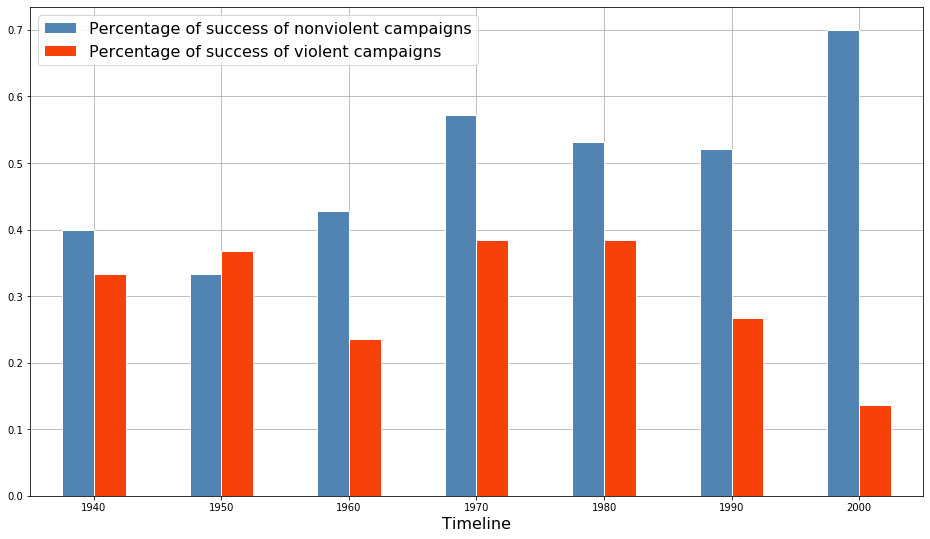

In [3]:
# calculate violent success percentage
freq['viol_success_chance'] = (freq['viol_success']/freq['viol'])

# create new dataframe with specified decades for barplot 
succ = pd.DataFrame()
succ['Percentage of success of nonviolent campaigns'] = freq['nonviol_success_chance'].loc[freq['decade'] >= 1940]
succ['Percentage of success of violent campaigns'] = freq['viol_success_chance'].loc[freq['decade'] >= 1940]

# same as question 3. no secodary y-axis, legend handling simpler
ax = succ.plot(kind = 'bar', rot = 0, figsize = (16,9), grid = True, color = ['#5184B2', '#F64108'], edgecolor = 'white')
ax.set_xticklabels(freq['decade'].loc[freq['decade'] >= 1940].to_frame().decade.astype(int))
ax.set_xlabel('Timeline', fontsize = 16)
ax.legend(loc = 2, fontsize = 16)
ax.set_axisbelow(True)
plt.show()

## Question 4

* We return to our first dataframe, and sort it by the peak membership of the resistances
* We select the specified columns and drop the rest
* We can see Greece appearing in 16th place, on account of the events during the 1963 Greek legislative elections 

In [4]:
peak_memb = df.sort_values(by = ['peakmembership'], ascending = False).head(25)
peak_memb = peak_memb[['peakmembership', 'byear', 'eyear', 'location', 'target', 'viol', 'success']].reset_index(drop = True)
peak_memb

,peakmembership,byear,eyear,location,target,viol,success
0,4500000.0,1937,1945-01-01,China,Japanese occupation,1,0
1,2000000.0,1977,1979-01-01,Iran,Shah Reza Pahlavi,0,1
2,2000000.0,1986,1983-01-01,Philippines,Ferdinand Marcos,0,1
3,1000000.0,1988,1988-01-01,Burma,military junta,0,0
4,1000000.0,1989,1989-01-01,China,Communist regime,0,0
5,1000000.0,1967,1968-01-01,China,anti-Maoists,1,0
6,1000000.0,1922,1949-01-01,China,Kuomintang regime,1,1
7,1000000.0,2006,2006-01-01,Mexico,Calderon regime,0,0
8,1000000.0,2005,2005-01-01,Lebanon,Syrian forces,0,1
9,1000000.0,1993,1999-01-01,Nigeria,Military rule,0,1


## Question 5

* We read the dataset, creating a dataframe with the necessary columns and dropping NaN values
* We run the logistic regression with the specified features (success being the regressand and mempc, lnpop being regressors), <br>
    make predictions on the original dataset and create a summary
* Membership per capita affects the results the most, with a high coefficient and low p value (0)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import logit
%matplotlib inline

# read dataset and create new dataframe with necessary columns, without NaN values
df = pd.read_stata("WCRWreplication.dta")
partic = df[['mempc', 'lmembers', 'lnpop', 'success']].dropna().reset_index(drop = True)

# run logistic regression
model = logit("success ~ mempc + lnpop", partic).fit()
predictions = model.predict(partic)
model.summary()

Optimization terminated successfully.
         Current function value: 0.594790
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  163
Model:                          Logit   Df Residuals:                      160
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1294
Time:                        13:55:35   Log-Likelihood:                -96.951
converged:                       True   LL-Null:                       -111.35
Covariance Type:            nonrobust   LLR p-value:                 5.551e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.8199      1.921     -3.030      0.002      -9.584      -2.055
mempc          4.4892      0.986      4.554      0.000       2.557       6.421
lnpop          0.0907      0.129      0.706      0.480      -0.161       0.343
==============================================================================
"""

* Finally, we create our scatterplot
* Higher participation directly affects the success of the campaign

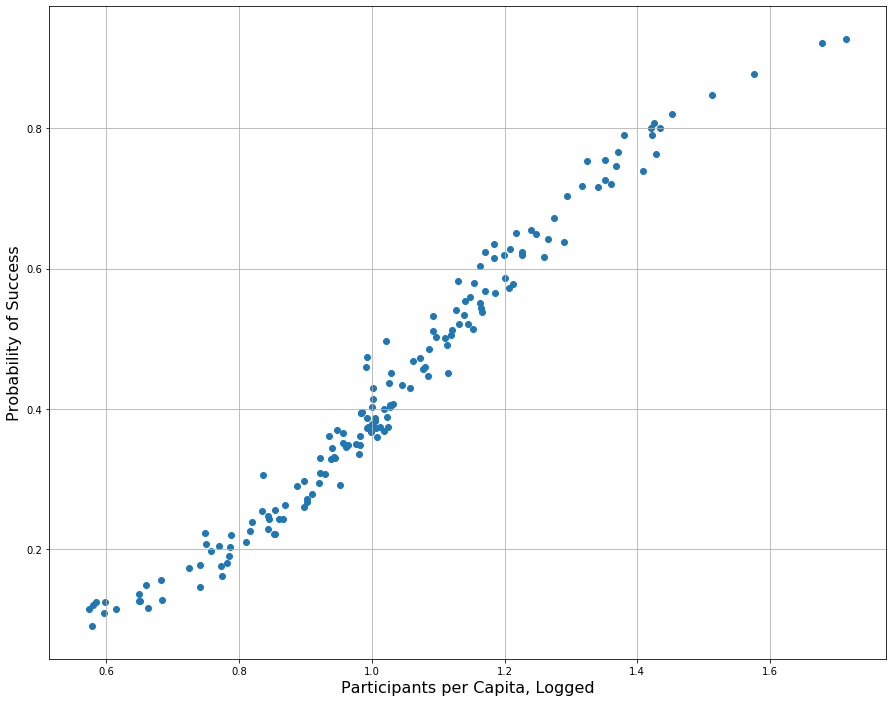

In [8]:
# create scatterplot
plt.figure(figsize = (15,12))
plt.scatter(partic['mempc'], predictions)
plt.grid(True)
plt.rc('axes', axisbelow = True)
plt.xlabel("Participants per Capita, Logged", fontsize = 16)
plt.ylabel("Probability of Success", fontsize = 16)
plt.show()

## Question 6

* In order to find the tipping point, we'll have to divide the number of partcipants with number of the general population <br> 
    (specifically, only for the occasions that are deemed successful, so based on our predictions from question 5, the occassions <br>
    with chance to succeed above 50%) and then calculate the mean value of the results
* However, since the variables lmembers and lnpop are logged values, we'll be finding their inverses first
* Another thing to note, the values of lnpop appear to have been further modified compared to the original values; the author has divided the population by 1000 before logging them. <br>
    So a population of ~10.31 was calculated as ln(30.000.000/1000). Thus, we multiply inverse lnpop with 1000
* Below is the inverse of lnpop, showing odd values for a country's population

In [10]:
np.exp(partic.lnpop).to_frame()

,lnpop
0,6763.062012
1,5354.529785
2,98626.750000
3,3239.238770
4,11126.726562
...,...
158,57288.019531
159,79739.851562
160,237836.609375
161,212975.687500


* We'll now apply the logic described before
* The result is close to the widely accepted one: ~3.5

In [11]:
partic['succ_pred'] = predictions
pop_succ = np.exp(partic[(partic['succ_pred'] > 0.5) & partic['success'] == 1].lmembers)/\
            (np.exp(partic[(partic['succ_pred'] > 0.5) & partic['success'] == 1].lnpop)*1000)
print("The population percentage necessary for a civil resistence movement to be statistically successful is " + str(round(pop_succ.mean()*100, 2)) + "%")

The population percentage necessary for a civil resistence movement to be statistically successful is 3.33%


## Question 7

* We run another logistic regression, with success as regressand and nonviol, tpolity, lmembers and lnpop as regressors
* Then, we print the summary of the model
* Relatively low coefficient and a p value greater than 0.05 suggests that the POLITY IV score is not statistically significant. <br>
    nonviol's p value is barely greater than 0.05 (0.051)

In [1]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit
%matplotlib inline

# read dataset
df = pd.read_stata("WCRWreplication.dta")

nv_loc = df[['success', 'nonviol', 'tpolity', 'lmembers', 'lnpop']].dropna().reset_index(drop = True)

model = logit("success ~ nonviol + tpolity + lmembers + lnpop", nv_loc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.567143
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  141
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                            4
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                  0.1627
Time:                        21:45:26   Log-Likelihood:                -79.967
converged:                       True   LL-Null:                       -95.506
Covariance Type:            nonrobust   LLR p-value:                 2.953e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1085      1.413     -0.077      0.939      -2.878       2.661
nonviol        0.9048      0.464      1.952      0.051      -0.004       1.813
tpolity        0.0520      0.030      1.744      0.081      -0.006       0.110
lmembers       0.3751      0.128      2.926      0.003       0.124       0.626
lnpop         -0.4363      0.142     -3.067      0.002      -0.715      -0.157
==============================================================================
"""

* Controlling for the geographical location does not yield expected values
* The dataset provides as with dummy values of each general location a campaign was located on (ex. Greece in Europe)
* However, if we run a logistic regression with these regressors, we'll either run to NaN or equal values between the location regressors on the model's summary

In [2]:
nv_loc = df[['success', 'nonviol', 'europe', 'africa', 'fsu', 'middleeast', 'americas', 'asia']].dropna().reset_index(drop = True)

model2 = logit("success ~ nonviol + europe + africa + fsu + middleeast + americas + asia", nv_loc).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 6


C:\Users\user\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  323
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            6
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                 0.08320
Time:                        21:45:26   Log-Likelihood:                -191.12
converged:                       True   LL-Null:                       -208.47
Covariance Type:            nonrobust   LLR p-value:                 4.950e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9785        nan        nan        nan         nan         nan
nonviol        1.2582      0.265      4.751      0.000       0.739       1.777
europe        -0.2938        nan        nan        nan         nan         nan
africa         0.2647        nan        nan        nan         nan         nan
fsu            0.0056        nan        nan        nan         nan         nan
middleeast    -0.7589        nan        nan        nan         nan         nan
americas       0.3016        nan        nan        nan         nan         nan
asia          -0.4977        nan        nan        nan         nan         nan
==============================================================================
"""

* As a test, we will "dirty" the location columns by adding a very small number
* The regression now runs, but we can see the results are disastrous. The location columns do not allow for a correct run 

In [3]:
nv_loc[['europe', 'africa', 'fsu', 'middleeast', 'americas', 'asia']] = nv_loc[['europe', 'africa', 'fsu', 'middleeast', 'americas', 'asia']] + 0.001*np.random.rand(nv_loc['success'].size, 6)

model3 = logit("success ~ nonviol + europe + africa + fsu + middleeast + americas + asia", nv_loc).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.589009
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  323
Model:                          Logit   Df Residuals:                      315
Method:                           MLE   Df Model:                            7
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                 0.08739
Time:                        21:45:29   Log-Likelihood:                -190.25
converged:                       True   LL-Null:                       -208.47
Covariance Type:            nonrobust   LLR p-value:                 5.998e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -231.5834    175.219     -1.322      0.186    -575.007     111.840
nonviol        1.2681      0.266      4.772      0.000       0.747       1.789
europe       229.5960    174.669      1.314      0.189    -112.750     571.942
africa       230.1736    174.686      1.318      0.188    -112.206     572.553
fsu          229.8742    174.654      1.316      0.188    -112.441     572.189
middleeast   229.1763    174.705      1.312      0.190    -113.238     571.591
americas     230.1978    174.677      1.318      0.188    -112.162     572.558
asia         229.3684    174.651      1.313      0.189    -112.941     571.678
==============================================================================
"""

* We can also remove one of location columns, avoiding collinearity

In [7]:
nv_loc = df[['success', 'nonviol', 'europe', 'africa', 'fsu', 'middleeast', 'americas', 'asia']].dropna().reset_index(drop = True)

model4 = logit("success ~ nonviol + europe + fsu + middleeast + americas + asia", nv_loc).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.591713
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  323
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            6
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                 0.08320
Time:                        21:47:22   Log-Likelihood:                -191.12
converged:                       True   LL-Null:                       -208.47
Covariance Type:            nonrobust   LLR p-value:                 4.950e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7139      0.241     -2.965      0.003      -1.186      -0.242
nonviol        1.2582      0.265      4.751      0.000       0.739       1.777
europe        -0.5585      0.401     -1.393      0.164      -1.344       0.227
fsu           -0.2590      0.514     -0.504      0.614      -1.266       0.748
middleeast    -1.0235      0.485     -2.112      0.035      -1.974      -0.073
americas       0.0369      0.373      0.099      0.921      -0.694       0.768
asia          -0.7624      0.355     -2.149      0.032      -1.458      -0.067
==============================================================================
"""

* Or remove most of them, controlling for a single area's location

In [8]:
model5 = logit("success ~ nonviol + europe", nv_loc).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.606240
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                success   No. Observations:                  323
Model:                          Logit   Df Residuals:                      320
Method:                           MLE   Df Model:                            2
Date:                Sun, 01 Dec 2019   Pseudo R-squ.:                 0.06069
Time:                        21:48:57   Log-Likelihood:                -195.82
converged:                       True   LL-Null:                       -208.47
Covariance Type:            nonrobust   LLR p-value:                 3.201e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0602      0.159     -6.667      0.000      -1.372      -0.749
nonviol        1.2672      0.257      4.937      0.000       0.764       1.770
europe        -0.2181      0.347     -0.628      0.530      -0.899       0.463
==============================================================================
"""